In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("parkingLot.csv")
df

,vehicle_no,timestamp,camera_id
0,MHUN7063,2024-09-12 05:00:00,1
1,MHYN4677,2024-09-12 05:00:00,1
2,MHEL6595,2024-09-12 05:00:00,1
3,MHNQ2590,2024-09-12 05:00:00,1
4,MHHA0518,2024-09-12 05:00:00,1
...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2
106690,MHVY8418,2024-11-14 00:00:00,2
106691,MHSR8102,2024-11-14 00:00:00,2
106692,MHQG5264,2024-11-14 00:00:00,2


In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

entries_df = df[df['camera_id'] == 1]

vehicles_per_day = entries_df.groupby('date')['vehicle_no'].nunique()
vehicles_per_day

date
2024-09-12     886
2024-09-13     809
2024-09-14     861
2024-09-15    1073
2024-09-16     843
              ... 
2024-11-09     865
2024-11-10     944
2024-11-11     828
2024-11-12     806
2024-11-13     781
Name: vehicle_no, Length: 63, dtype: int64

<Axes: xlabel='date'>

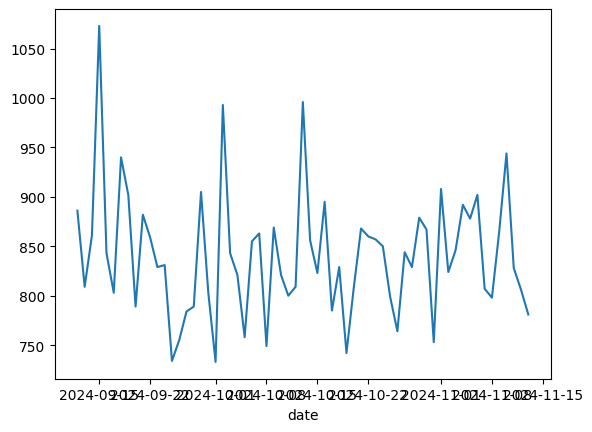

In [7]:
vehicles_per_day.plot(kind='line')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

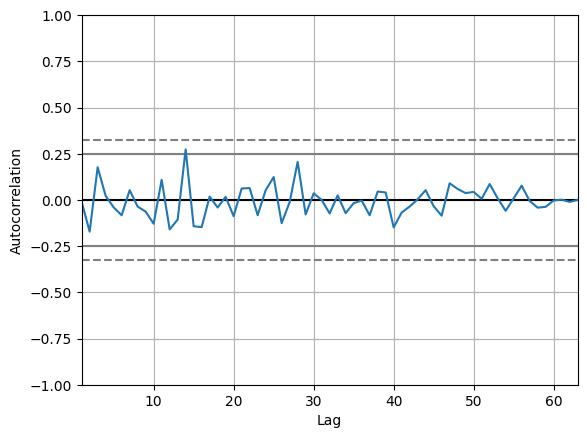

In [8]:

import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(vehicles_per_day)


In [9]:


from sklearn.metrics import mean_absolute_error, mean_absolute_error

X = vehicles_per_day.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]




history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
print(mean_absolute_error(test, predictions))

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
print(mean_absolute_error(test, predictions))

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
print(mean_absolute_error(test, predictions))
                




C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


40.31265604105806
42.51180588400306


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


44.604029929169464


In [10]:

import numpy as np
from sklearn.linear_model import LinearRegression

vehicles_per_day = vehicles_per_day.reset_index()
vehicles_per_day['day_of_week'] = vehicles_per_day['date'].apply(lambda x: x.weekday())
vehicles_per_day['day_of_week'] = vehicles_per_day['day_of_week'].astype('category')

vehicles_per_day['day_of_week'] = vehicles_per_day['day_of_week'].cat.codes

X = vehicles_per_day[['day_of_week']]
y = vehicles_per_day['vehicle_no']

size = int(len(X) * 0.8)
train_X, test_X = X[0:size], X[size:len(X)]
train_y, test_y = y[0:size], y[size:len(y)]

model = LinearRegression()
model.fit(train_X, train_y)
predictions = model.predict(test_X)

print(mean_absolute_error(test_y, predictions))


41.371114599686024


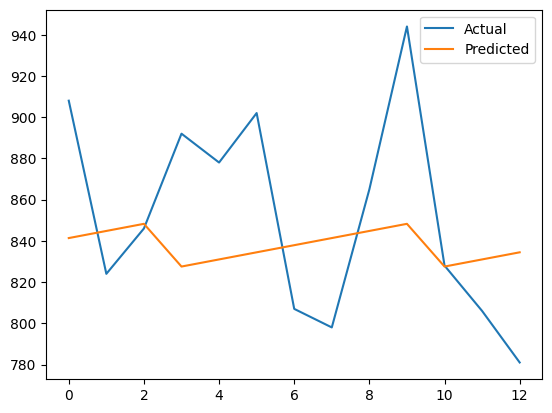

In [15]:
# draw graph between actual and predicted values
test_y = test_y.reset_index(drop=True)
plt.plot(test_y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


In [18]:
# write code for MASE and MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def MASE(actual, pred):
    n = len(actual)
    d = np.abs(np.diff(actual)).sum() / (n - 1)
    if d == 0:
        return np.inf 
    errors = np.abs(actual - pred).sum()
    return errors.mean() / d

print("MAPE: ", mean_absolute_percentage_error(test_y, predictions))
print("MASE: ", MASE(test_y, predictions))


MAPE:  4.764637754486327
MASE:  10.702974921311808
